In [3]:
!pip list

Package            Version
------------------ ---------
asttokens          2.0.5
backcall           0.2.0
boto3              1.26.45
botocore           1.29.45
certifi            2022.12.7
click              8.1.3
comm               0.1.2
cycler             0.11.0
debugpy            1.5.1
decorator          5.1.1
dill               0.3.4
easydict           1.9
entrypoints        0.4
executing          0.8.3
Flask              2.1.0
Flask-Cors         3.0.9
importlib-metadata 6.0.0
ipykernel          6.19.2
ipython            8.7.0
itsdangerous       2.1.2
jedi               0.18.1
Jinja2             3.1.2
jmespath           1.0.1
jupyter_client     7.4.8
jupyter_core       5.1.1
kiwisolver         1.4.4
MarkupSafe         2.1.1
matplotlib         3.3.2
matplotlib-inline  0.1.6
nest-asyncio       1.5.6
numpy              1.20.0
opencv-python      4.5.3.56
packaging          22.0
parso              0.8.3
pexpect            4.8.0
pickleshare        0.7.5
Pillow             8.0.1
pip      

In [4]:
from pytorch_examples.examples.fast_neural_style.neural_style.vgg import Vgg16
from pytorch_examples.examples.fast_neural_style.neural_style.transformer_net import TransformerNet
import torch
import re
import cv2
from pytorch_examples.examples.fast_neural_style.neural_style import utils
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

import cv2
import matplotlib.pyplot as plt


In [5]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower


In [6]:
device = torch.device( "cuda" )
# Loads pre-trained weights
rain_princess_path = './saved_models/rain_princess.pth'
candy_path = './saved_models/candy.pth'
mosaic_path = './saved_models/mosaic.pth'
udnie_path = './saved_models/udnie.pth'

# Loads the pre-trained weights into the fast neural style transfer
# network architecture and puts the network on the Cloud TPU core.
def load_style(path):
  with torch.no_grad():
    model = TransformerNet()
    state_dict = torch.load(path)
    # filters deprecated running_* keys from the checkpoint
    for k in list(state_dict.keys()):
        if re.search(r'in\d+\.running_(mean|var)$', k):
            del state_dict[k]
    model.load_state_dict(state_dict)
    return model.to(device)

# Creates each fast neural style transfer network
rain_princess = load_style(rain_princess_path)
candy = load_style(candy_path)
mosaic = load_style(mosaic_path)
udnie = load_style(udnie_path)

/home/bai/anaconda3/envs/python38/lib/python3.8/site-packages/torch/cuda/__init__.py:106: UserWarning: 
NVIDIA GeForce RTX 3070 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3070 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


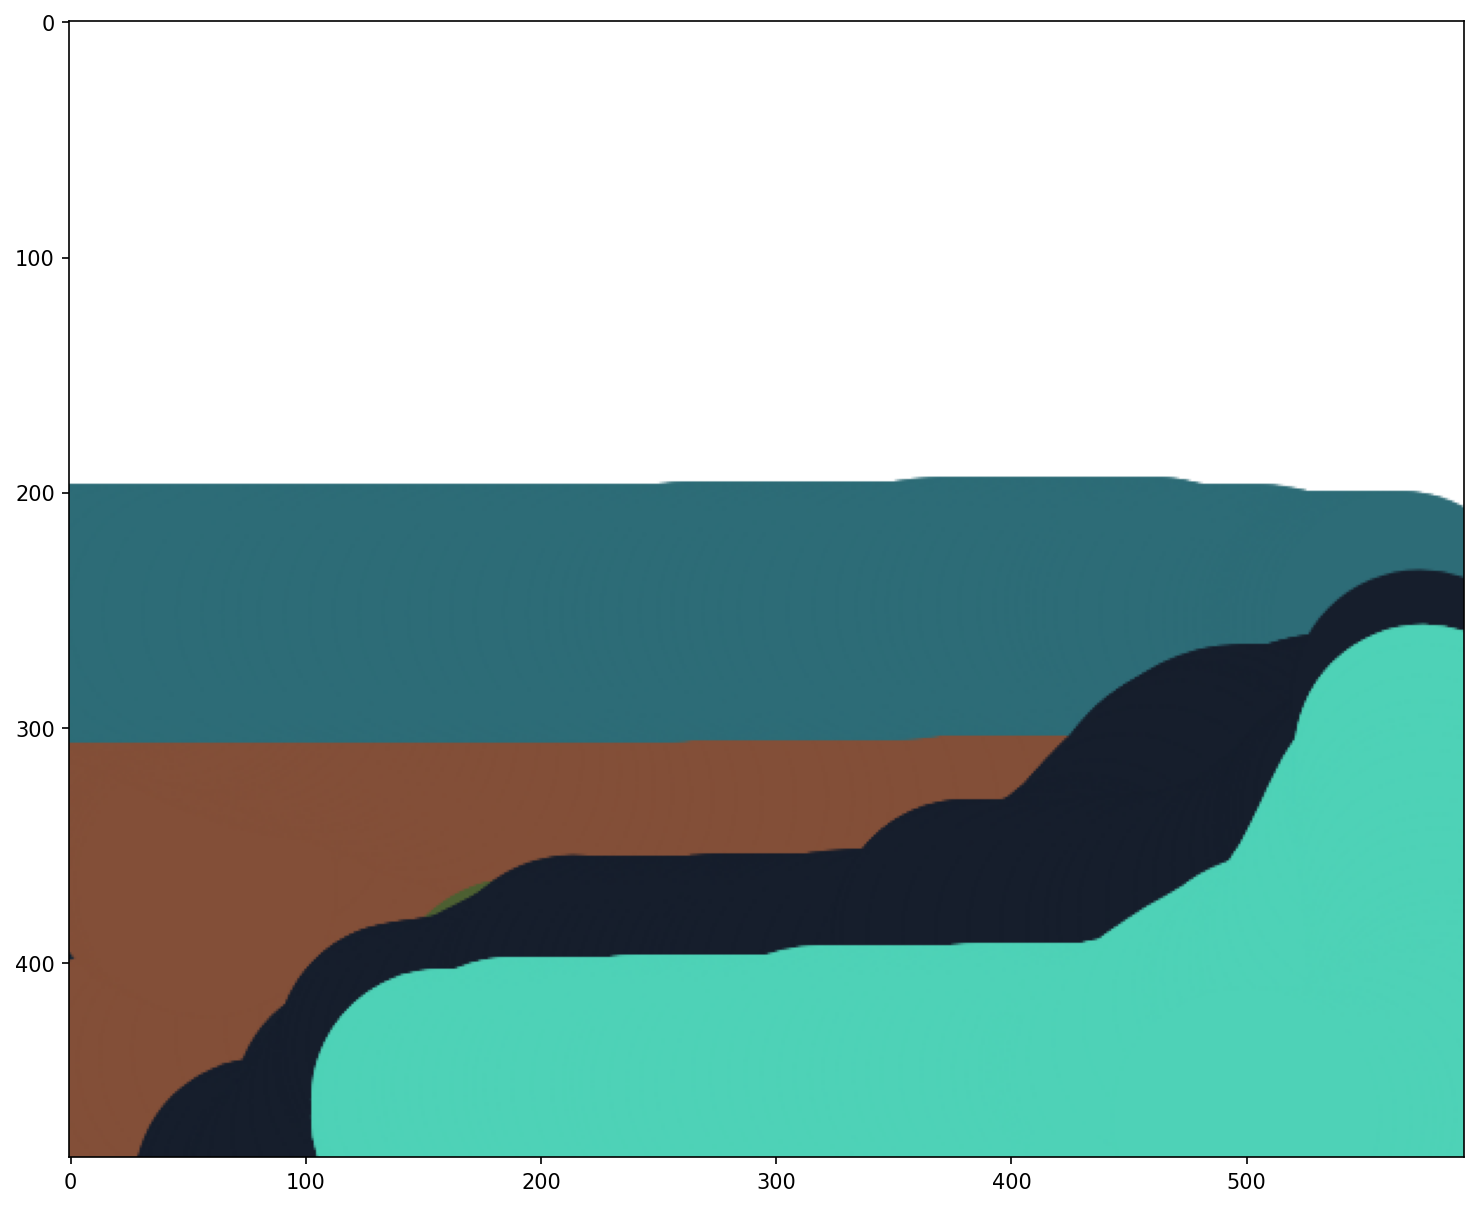

In [9]:
#@markdown ### Image URL (right click -> copy image address):
# content_image_url = 'https://i.imgur.com/Ziu12UK.png' #@param {type:"string"}
content_image = 'content.jpg'
# !wget -O "$content_image" "$content_image_url"
RESULT_IMAGE = '/tmp/result.jpg'
!rm -f "$RESULT_IMAGE"
img = cv2.imread(content_image, cv2.IMREAD_UNCHANGED)

content_image = utils.load_image(content_image, scale=None)
content_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
content_image = content_transform(content_image)
content_image = content_image.unsqueeze(0).to(device)


window_name = 'image'

plt.imshow(img)
plt.show()




In [12]:
with torch.no_grad():
#   output = rain_princess(content_image)
#   output = candy(content_image)
#   output = mosaic(content_image)
  output = udnie(content_image)


utils.save_image(RESULT_IMAGE, output[0].cpu())
img = cv2.imread(RESULT_IMAGE, cv2.IMREAD_UNCHANGED)
plt.imshow(img,cmap='gray')
plt.show()


RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.